# Establish Relations - 1D

In [1]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader
#Import numpy for array calculation
import numpy as np

import re

#import nltk for string operations
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [2]:
# Load the model
model = gensim.downloader.load('glove-wiki-gigaword-50')
dims = 50

In [12]:
# Prepared a country-capital tuple list
country_capital_tuples = [
("india", "delhi"),
("afghanistan", "kabul"),
("angola", "luanda"),
("australia", "canberra"),
("brazil", "brasilia"),
("canada", "ottawa"),
("denmark", "copenhagen"),
("egypt", "cairo"),
("england", "london"),
("greece", "athens"),
("indonesia", "jakarta"),
("iran", "tehran"),
("ireland", "dublin"),
("japan", "tokyo"),
("russia", "moscow"),
("spain", "madrid"),
("chile", "santiago"),
("Singapore", "Singapore"),
("Slovakia", "Bratislava"),
("Slovenia", "Ljubljana"),
("Somalia", "Mogadishu"),
("Korea", "Seoul"),
("Sudan", "Khartoum"),
("Suriname", "Paramaribo"),
("Sweden", "Stockholm"),
("Switzerland", "Bern"),
("Syria", "Damascus"),
("Taiwan", "Taipei"),
("Tajikistan", "Dushanbe"),
("Tanzania", "Dodoma"),
("Thailand", "Bangkok")
]

In [13]:

len(country_capital_tuples)

31

In [15]:
# created a separate list for country-capital word vectors
country_capital_vectors = []

# temporarily reducing dimensions to 1
x_1d = []
y_1d = []

for tup in country_capital_tuples:
    country_vec = model.get_vector(tup[0].lower())[0]
    y_1d.append(country_vec)
    capital_vec = model.get_vector(tup[1].lower())[0]
    x_1d.append(capital_vec)
    country_capital_vectors.append((country_vec, capital_vec))


## Relation Visualisation

### 2D Plot Test

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

[]

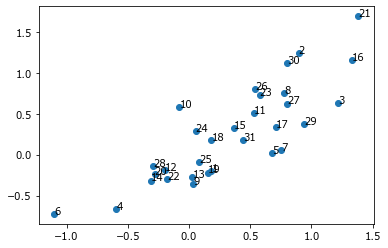

In [17]:
plt.scatter(x_1d, y_1d)
for i in range(len(x_1d)):
    plt.annotate(i+1, (x_1d[i], y_1d[i]))
plt.plot()

**Even with just 1 dimension of each country-capital vector, they seem to be positively correlated**

## Linear Regression

Since we want to establish a relationship between each country vector and capital vector with each vector having 50 dimensions, we'll have to regress separately on each dimension of the dependent variable.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# coefficients & intercepts 
coeff = []
intecept = 0

#reshaping x_1d
x_1d_train = np.array(x_1d).reshape((-1,1))
y_1d = np.array(y_1d)

# regression over country-capital 1D points
regr = LinearRegression()
regr.fit(x_1d_train, y_1d)
coeff = regr.coef_
intercept = regr.intercept_
print("Model Score: ", regr.score(x_1d_train,y_1d))

Model Score:  0.6980067237065299


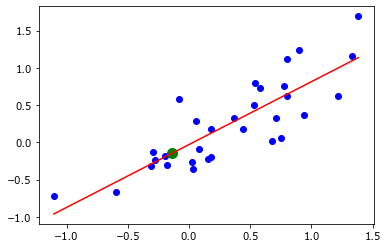

In [32]:
def predict_y(x):
    return coeff[0]*x + intercept

# plotting the regression line
start_point_y = predict_y(min(x_1d))
end_point_y = predict_y(max(x_1d))

plt.scatter(x_1d, y_1d, c="blue")

# placing the "country" vector
country_y = predict_y(model.get_vector("country")[0])
plt.scatter([model.get_vector("country")[0]], [country_y], c="green", s=100)

plt.plot([min(x_1d),max(x_1d)], [start_point_y, end_point_y], c="red")
plt.show()

This clearly proves that there is correlation between a country and its state vector.

**Prediction of a test capital's country vector**

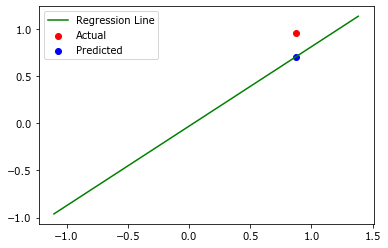

In [27]:
capital_point = model.get_vector("asmara")[0]
country_point_real = model.get_vector("eritrea")[0]
country_point_pred = predict_y(capital_point)

plt.scatter([capital_point], [country_point_real], c = "red")
plt.scatter([capital_point], [country_point_pred], c = "blue")
plt.plot([min(x_1d),max(x_1d)], [start_point_y, end_point_y], c="green")
plt.legend(["Regression Line", "Actual", "Predicted"])